# Linear Regression model

In [24]:
import gcsfs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cftime
from sklearn.linear_model import LinearRegression

### Load data

In [25]:
dqdz = np.load('../equation_discovery/variables/train_dqdz.npy')

In [26]:
wq = np.load('../equation_discovery/variables/train_wq.npy')

In [27]:
dqdz.shape,wq.shape

((2232, 47, 1), (2232, 47, 1))

### Data preprocess

In [28]:
#squeeze takes out dimensions with one in them
np.squeeze(dqdz).shape, np.squeeze(wq).shape

((2232, 47), (2232, 47))

In [64]:
#trying to just take part of a time sample to see how it looks. 
x[234:,].shape

(1998, 47)

#### Create training data

In [80]:
#take out column dimension
x = np.squeeze(dqdz)
y = np.squeeze(wq)

#takes first 1998 time samples
xtrain = x[234:,]
ytrain = y[234:,]
xtrain.shape, ytrain.shape

((1998, 47), (1998, 47))

Text(0.5, 1.0, 'Correlation for training data')

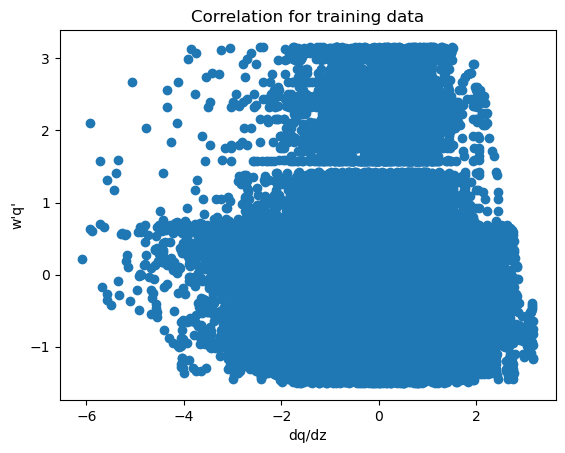

In [79]:
#plotting for visualization sake
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain)
ax.set_xlabel("dq/dz")
ax.set_ylabel("w'q'")
ax.set_title("Correlation for training data")

In [81]:
#creating testing data by splitting time
x_test_data = x[:234,]
x_test_data.shape

(234, 47)

In [82]:
#create model
model = LinearRegression()  #initiate linear regression
model.fit(x,y)  #fit the linear regression model to the dataset
model.coef_  #get the slope of the line
model.intercept_  #get the y-int of the line
y_prediction = model.predict(x_test_data)  #predict the y's based on the test data (using coef and intercept)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


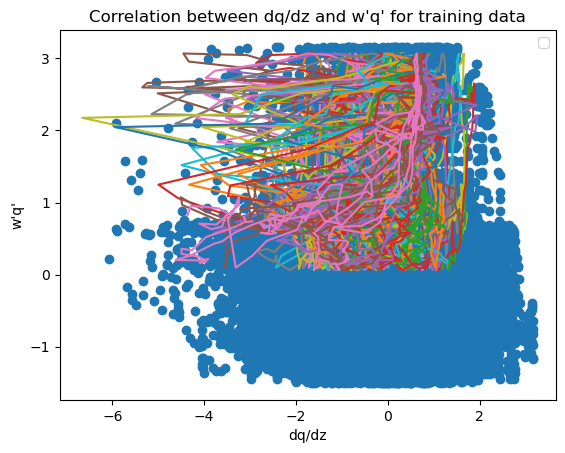

In [88]:
#plot and predictions
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain)
ax.set_xlabel("dq/dz")
ax.set_ylabel("w'q'")
ax.set_title("Correlation between dq/dz and w'q' for training data")
plt.plot(x_test_data,y_prediction)
ax.legend()